In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q kaggle
!cp /content/drive/MyDrive/colab/kaggle.json /content/kaggle.json
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df

## Visualize

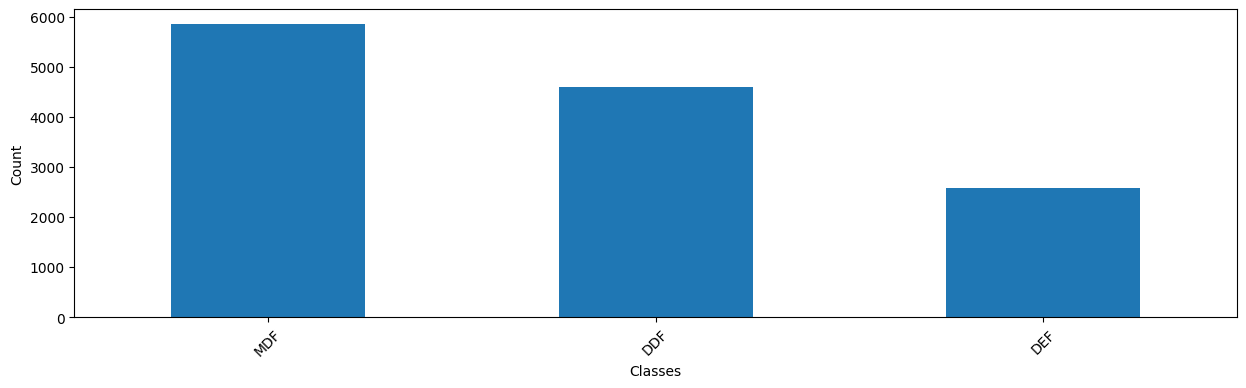

In [ ]:
class_counts = train_df['nforest_type'].value_counts()

# Plotting
plt.figure(figsize=(15, 4))
class_counts.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
num_rows = 4
num_cols = 3
num_plots = num_rows * num_cols

# Create figure and axes
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(28, 15))

# Flatten the axes array for easier iteration
axs_flat = axs.flatten()

# Plot each feature
for i, col in enumerate(train_df.columns[1:13]):  # Assuming the first column is 'id'
    ax = axs_flat[i]
    ax.bar(train_df['id'], train_df[col])
    ax.set_xlabel('id')
    ax.set_ylabel(col)
    ax.set_title(f'Bar Chart for {col}')

# Remove any unused subplots
for i in range(len(train_df.columns) - 1, num_plots):
    fig.delaxes(axs_flat[i])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Add feature

In [7]:
b1 = train_df['b1']
b11 = train_df['b11']
b12 = train_df['b12']
b2 = train_df['b2']
b3 = train_df['b3']
b4 = train_df['b4']
b5 = train_df['b5']
b6 = train_df['b6']
b7 = train_df['b7']
b8 = train_df['b8']
b8a = train_df['b8_a']
b9 = train_df['b9']

In [8]:
train_df['NDVI'] = (train_df['b8'] - train_df['b4']) / (train_df['b8'] + train_df['b4'])
train_df['EVI'] = 2.5 * ((train_df['b8'] - train_df['b4']) / (train_df['b8'] + 6 * train_df['b4'] - 7.5 * train_df['b2'] + 1.01))
train_df['NDWI'] = (train_df['b3'] - train_df['b8']) / (train_df['b3'] + train_df['b8'])
train_df['SAVI'] = (train_df['b8'] - train_df['b4']) * (1 + 0.5) / (train_df['b8'] + train_df['b4'] + 0.5)
train_df['MSAVI'] = (2 * train_df['b8'] + 1 - ( (2 * train_df['b8'] + 1) ** 2 - 8 * (train_df['b8'] - train_df['b4'])) ** (1 / 2)) / 2
train_df['GNDVI'] = (train_df['b8'] - train_df['b3']) / (train_df['b8'] + train_df['b3'])
train_df['RENDVI'] = (train_df['b8'] - train_df['b5']) / (train_df['b8'] + train_df['b5'])
train_df['NDMI'] = (train_df['b8'] - train_df['b11']) / (train_df['b8'] + train_df['b11'])
train_df['GRVI'] = (train_df['b3'] - train_df['b4']) / (train_df['b3'] + train_df['b4'])
train_df['TVI'] = ( (train_df['b8'] - train_df['b4']) / (train_df['b8'] + train_df['b4'] + 0.5) ) ** (1 / 2)
train_df['MCARI'] = ((train_df['b5'] - train_df['b4']) - 0.2 * (train_df['b5'] - train_df['b3'])) / (train_df['b5'] / train_df['b4'])
train_df['BSI'] =  ((train_df['b11'] + train_df['b4']) - (train_df['b8'] + train_df['b2'])) / ((train_df['b11'] + train_df['b4']) + (train_df['b8'] + train_df['b2']))
train_df['NBR'] = (train_df['b8'] - train_df['b12']) / (train_df['b8'] + train_df['b12'])
train_df['MSI'] = train_df['b11'] / train_df['b8']

## Add indexbase feature

In [ ]:
train_df['Adjusted transformed soil-adjusted VI'] = 1.22 * (b8 - 1.22 * b4 - 0.03) / (1.22 * b8 + b4 - 1.22 * 0.03 + 0.08 * (1 + 1.22 ** 2))
train_df['Aerosol free vegetation index 1600'] = b8 - 0.66 * b11 / (b8 + 0.66 * b11)
train_df['Aerosol free vegetation index 2100'] = b8 - 0.5 * b12 / (b8 + 0.56 * b12)
train_df['Alteration'] = b11 / b12
train_df['Anthocyanin reflectance index'] = 1 / b3 - 1 / b5
train_df['Atmospherically Resistant Vegetation Index 2'] = -0.18 + 1.17 * (b8 - b4) / (b8 + b4)
train_df['Blue-wide dynamic range vegetation index'] = (0.1 * b8 - b2) / (0.1 * b8 + b2)
train_df['Browning Reflectance Index'] = (1 / b3 - 1 / b5) / b8
train_df['Chlorophyll Absorption Ratio Index'] = (b5 / b4) * np.sqrt(((b5 - b3) / 150 * 670 + b4 + (b3 - ((b5 - b3) / 150 * 550))) ** 2) / np.sqrt(((b5 - b3) / (150 ** 2) + 1))
train_df['Chlorophyll Green'] = (b7 / b3) ** -1
train_df['Chlorophyll Index Green'] = (b8 / b3) - 1
train_df['Chlorophyll IndexRedEdge'] = (b8 / b5) - 1
train_df['Chlorophyll Red-Edge'] = (b7 / b5) ** -1
train_df['Chlorophyll vegetation index'] = b8 * b4 / (b3 ** 2)
train_df['Coloration Index'] = (b4 - b2) / b4
train_df['CRI550'] = (b2.astype(float) ** -1) - (b3.astype(float) ** -1)
train_df['CRI700'] = (b2.astype(float) ** -1) - (b5.astype(float) ** -1)
train_df['Datt1'] = (b8 - b5) / (b8 - b4)
train_df['Datt4'] = b4 / (b3 * b5)
train_df['Datt6'] = b8a / (b3 * b5)
train_df['Difference 678/500'] = b4 - b2
train_df['Difference 800/550'] = b8 - b3
train_df['Difference 800/680'] = b8 - b4
train_df['Difference 833/658'] = b8 - b4
train_df['Difference NIR/Green'] = b8 - b3
train_df['EVI'] = 2.5 * (b8 - b4) / (b8 + (6 * b4) + (-7.5 * b2) + 1)
train_df['EVI 2'] = 2.4 * (b8 - b4) / (b8 + b4 + 1)
train_df['Ferrous Silicates'] = b12 / b11
train_df['Global Environment Monitoring Index'] =  (2 * (b8 ** 2 - b4 ** 2) + 1.5 * b8 + 0.5 * b4) / (b8 + b4 + 0.5) * (1 - 0.25 * (2 * (b8 ** 2 - b4 ** 2) + 1.5 * b8 + 0.5 * b4) / (b8 + b4 + 0.5)) - ((b4 - 0.125) / (1 - b4))
train_df['Gossan'] = b11 / b4
train_df['Green atmospherically resistant vegetation index'] = (b8 - (b3 - (b2 - b4)))/(b8 - (b3 + (b2 - b4)))
train_df['Green leaf index'] = (2 * b3 - b4 - b2) / (2 * b3 + b4 + b2)
train_df['Green Normalized Difference Vegetation Index'] = (b8 - b3) / (b8 + b3)
train_df['Green Soil Adjusted Vegetation Index'] = (b8 - b3) / (b8 + b3 + 0.48) * (1 + 0.48)
train_df['Green-Blue NDVI'] = (b8 - (b3 + b2)) / (b8 + (b3 + b2))
train_df['Green-Red NDVI'] = (b8 - (b3 + b4)) / (b8 + (b3 + b4))
train_df['Hue'] = np.arctan((2 * b4 - b3 - b2) / (30.5 * (b3 - b2)))
train_df['Infrared percentage vegetation index'] = (b8 / (b8 + b4)) / 2 * (train_df['NDVI'] + 1)
train_df['Intensity'] = (1/30.5) * (b4 + b3 + b2)
train_df['Inverse reflectance 550'] = b3.astype(float) ** -1
train_df['Inverse reflectance 700'] = b5.astype(float) ** -1
train_df['Laterite'] = b11 / b12
train_df['Leaf Chlorophyll Index'] = (b8 - b5) / (b8 + b4)
train_df['Log Ratio'] = np.log(b8 / b4)
train_df['Maccioni'] = (b7 - b5) / (b7 - b4)
train_df['MCARI/MTVI2'] = (((b5 - b4) - 0.2 * (b5 - b3)) * (b5 / b4)) / (1.5 * (1.2 * (b8 - b3) - 2.5 * (b4 - b3)) / (np.sqrt((2 * b8 + 1) ** 2 - (6 * b8 - 5 * np.sqrt(4)) - 0.5)))
train_df['MCARI/OSAVI'] = ((b5 - b4) - 0.2 * (b5 - b3) * (b5 / b4))/ ((1 + 0.16) * (b8 - b4) / (b8 + b4 + 0.16))
train_df['mCRIG'] = (b2.astype(float) ** -1 - b3.astype(float) ** -1) * b8
train_df['mCRIRE'] = (b2.astype(float) ** -1 - b5.astype(float) ** -1) * b8
train_df['mND680'] = (b8 - b4) / (b8 + b4 - 2 * b1)
train_df['Modified anthocyanin reflectance index'] = (b3.astype(float) ** -1 - b5.astype(float) ** -1) * b8
train_df['Modified Chlorophyll Absorption in Reflectance Index'] = ((b5 - b4) - 0.2 * (b5 - b3)) * (b5 / b4)
train_df['Modified Chlorophyll Absorption in Reflectance Index 1'] = 1.2 * (2.5 * (b8 - b4) - 1.3 * (b8 - b3))
train_df['Modified Chlorophyll Absorption in Reflectance Index 2'] = 1.5 * (2.5 * (b8 - b4) - 1.3 * (b8 - b3)) / (np.sqrt((2 * b8 + 1) ** 2 - (6 * b8 - 5 * np.sqrt(b4)) - 0.5))
train_df['Modified NDVI'] = (b8 - b4) / (b8 + b4 - 2 * b1)
train_df['Modified Simple Ratio 670,800'] = ((b8 / b4) - 1) /np.sqrt((b8 - b4) + 1)
train_df['Modified Simple Ratio NIR/RED'] = ((b8 / b4) - 1) /np.sqrt((b8 / b4) + 1)
train_df['Modified Soil Adjusted Vegetation Index'] = (2 * b8 + 1 - np.sqrt((2 * b8 + 1) ** 2 - 8 * (b8 - b4)))/2
train_df['Modified Soil Adjusted Vegetation Index hyper'] = (0.5) * ((2 * b8 + 1) - np.sqrt((2 * b8 + 1) ** 2 - 8 * (b8 - b4)))
train_df['Modified Triangular Vegetation Index 1'] = 1.2 * (1.2 * (b8 - b3) - 2.5 * (b4 - b3))
train_df['Modified Triangular Vegetation Index 2'] = 1.5 * (1.2 * (b8 - b3) - 2.5 * (b4 - b3)) / np.sqrt((2 * b8 + 1) ** 2 - (6 * b8 - 5 * np.sqrt(b4)) - 0.5)
train_df['Norm G'] = b3 / (b8 + b4 + b3)
train_df['Norm NIR'] = b8 / (b8 + b4 + b3)
train_df['Norm R'] = b4 / (b8 + b4 + b3)
train_df['Normalized Difference 550/450'] = (b3 - b1) / (b3 + b1)
train_df['Normalized Difference 550/650'] = (b3 - b4) / (b3 + b4)
train_df['Normalized Difference 774/677'] = (b7 - b4) / (b7 + b4)
train_df['Normalized Difference 780/550'] = (b7 - b3) / (b7 + b3)
train_df['Normalized Difference 782/666'] = (b7 - b4) / (b7 + b4)
train_df['Normalized Difference 790/670'] = (b7 - b4) / (b7 + b4)
train_df['Normalized Difference 800/2170'] = (b8 - b12) / (b8 + b12)
train_df['Normalized Difference 800/470'] = (b8 - b2) / (b8 + b2)
train_df['Normalized Difference 800/500'] = (b8 - b2) / (b8 + b2)
train_df['Normalized Difference 800/550'] = (b8 - b3) / (b8 + b3)
train_df['Normalized Difference 800/650'] = (b8 - b4) / (b8 + b4)
train_df['Normalized Difference 800/675'] = (b8 - b4) / (b8 + b4)
train_df['Normalized Difference 800/680'] = (b8 - b4) / (b8 + b4)
train_df['Normalized Difference 819/1600'] = (b8 - b11) / (b8 + b11)
train_df['Normalized Difference 819/1649'] = (b8 - b11) / (b8 + b11)
train_df['Normalized Difference 820/1600'] = (b8 - b11) / (b8 + b11)
train_df['Normalized Difference 827/668'] = (b8 - b4) / (b8 + b4)
train_df['Normalized Difference 833/1649'] = (b8 - b11) / (b8 + b11)
train_df['Normalized Difference 833/658'] = (b8 - b4) / (b8 + b4)
train_df['Normalized Difference 860/1640'] = (b8a - b11) / (b8a + b11)
train_df['Normalized Difference 895/675'] = (b8 - b4) / (b8 + b4)
train_df['Normalized Difference Green/Red'] = (b3 - b4) / (b3 + b4)
train_df['Normalized Difference NIR/Blue'] = (b8 - b2) / (b8 + b2)
train_df['Normalized Difference NIR/Green'] = (b8 - b3) / (b8 + b3)
train_df['Normalized Difference NIR/Red'] = (b8 - b4) / (b8 + b4)
train_df['Normalized Difference NIR/Rededge'] = (b8 - b5) / (b8 + b5)
train_df['Normalized Difference Red/Green'] = (b4 - b3) / (b4 + b3)
train_df['Normalized Difference Salinity Index'] = (b11 - b12) / (b11 + b12)
train_df['Normalized Difference Vegetation Index 690-710'] = (b8 - b5) / (b8 + b5)
train_df['Optimized Soil Adjusted Vegetation Index'] = (1 + 0.16) * (b8 - b4) / (b8 + b4 + 0.16)
train_df['Pan NDVI'] = (b8 - (b3 + b4 + b2)) / (b8 + (b3 + b4 + b2))
train_df['RDVI'] = (b8 - b4) / ((b8 + b4).pow(0.5))
train_df['RDVI2'] = (b8 - b4) / ((b8 + b4).pow(0.5))
train_df['Red edge 1'] = b5 / b4
train_df['Red edge 2'] = (b5 - b4) / (b5 + b4)
train_df['Red-Blue NDVI'] = (b8 - (b4 + b2)) / (b8 + (b4 + b2))
train_df['Red-Edge Inflection Point 1'] = 700 + 40 * ((((b4 + b7) / 2) - b5) / (b6 - b5))
train_df['Red-Edge Inflection Point 2'] = 702 + 40 * ((((b4 + b7) / 2) - b5) / (b6 - b5))
train_df['Red-Edge Inflection Point 3'] = 705 + 35 * ((((b4 + b7) / 2) - b5) / (b6 - b5))
train_df['Red-Edge Position Linear Interpolation'] = 700 + 40 * ((((b4 + b7) / 2) - b5) / (b6 - b5))
train_df['Reflectance at the inflexion point'] = (b4 + b7) / 2
train_df['Renormalized Difference Vegetation Index'] = (b8 - b4) / ((b8 + b4).pow(0.5))
train_df['Simple Ratio 1600/820'] = b11 / b8
train_df['Simple Ratio 1650/2218'] = b11 / b12
train_df['Simple Ratio 440/740'] = b1 / b6
train_df['Simple Ratio 450/550'] = b1 / b3
train_df['Simple Ratio 520/670'] = b2 / b4
train_df['Simple Ratio 550/800'] = b3 / b8
train_df['Simple Ratio 560/658'] = b3 / b4
train_df['Simple Ratio 675/555'] = b4 / b3
train_df['Simple Ratio 675/705'] = b4 / b5
train_df['Simple Ratio 700'] = 1 / b5
train_df['Simple Ratio 710/670'] = b5 / b4
train_df['Simple Ratio 735/710'] = b6 / b5
train_df['Simple Ratio 774/677'] = b7 / b4
train_df['Simple Ratio 800/2170'] = b8 / b12
train_df['Simple Ratio 800/500'] = b8 / b2
train_df['Simple Ratio 810/560'] = b8 / b3
train_df['Simple Ratio 833/1649'] = b8 / b11
train_df['Simple Ratio 833/658'] = b8 / b4
train_df['Simple Ratio 850/710'] = b8 / b5
train_df['Simple Ratio 860/550'] = b8a / b3
train_df['Simple Ratio 860/708'] = b8a / b5
train_df['Simple Ratio NIR/700-715'] = b8 / b5
train_df['Simple Ratio NIR/G'] = b8 / b3
train_df['Simple Ratio NIR/RED'] = b8 / b4
train_df['Simple Ratio NIR/Rededge'] = b8 / b5
train_df['Simple Ratio Red/Blue'] = b4 / b2
train_df['Simple Ratio Red/Green'] = b4 / b3
train_df['Simple Ratio Red/NIR'] = b4 / b8
train_df['Soil Adjusted Vegetation Index'] = (b8 - b4) / (b8 + b4 + 0.48) * (1 + 0.48)
train_df['SQRT(IR/R)'] = (b8 / b4).pow(0.5)
train_df['Structure Intensive Pigment Index 1'] = (b8 - b1) / (b8 - b4)
train_df['Structure Intensive Pigment Index 3'] = (b8 - b2) / (b8 - b4)
train_df['TCARI/OSAVI'] = (3 * ((b5 - b4) - (0.2 * (b5 - b3) * (b5 / b4)))) / ((1 + 0.16) * ((b8 - b4)/(b8 + b4 + 0.16)))
train_df['Transformed Chlorophyll Absorbtion Ratio'] = 3 * ((b5 - b4) - (0.2 * (b5 - b3) * (b5 / b4)))
train_df['Transformed NDVI'] = ((b8 - b4) / (b8 + b4) + 0.5).pow(0.5)
train_df['Triangular chlorophyll index'] = 1.2 * (b5 - b3) - 1.5 * (b4 - b3) * (b5 / b4).pow(0.5)
train_df['Vegetation Index 700'] = (b5 - b4) / (b5 + b4)
train_df['Visible Atmospherically Resistant Index Green'] = (b3 - b4) / (b3 + b4 + b2)
train_df['Visible Atmospherically Resistant Indices RedEdge'] = (b5 - b4) / (b5 + b4)
train_df['Wide Dynamic Range Vegetation Index'] = (0.1 * b8 - b4) / (0.1 * b8 + b4)

In [10]:
train_df.shape

(13053, 173)

# ML

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
feature = [
    'b1', 'b11', 'b12', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b8_a', 'b9', 'NDVI', 'EVI', 'NDWI', 'SAVI', 'MSAVI',
    'GNDVI', 'RENDVI', 'NDMI', 'GRVI', 'TVI', 'MCARI', 'BSI', 'NBR', 'MSI'
    , 'Adjusted transformed soil-adjusted VI',
    'Aerosol free vegetation index 1600', 'Aerosol free vegetation index 2100', 'Alteration', 'Anthocyanin reflectance index',
    'Atmospherically Resistant Vegetation Index 2', 'Blue-wide dynamic range vegetation index', 'Browning Reflectance Index',
    'Chlorophyll Absorption Ratio Index', 'Chlorophyll Green', 'Chlorophyll Index Green', 'Chlorophyll IndexRedEdge',
    'Chlorophyll Red-Edge', 'Chlorophyll vegetation index', 'Coloration Index', 'CRI550', 'CRI700', 'Datt1', 'Datt4',
    'Datt6', 'Difference 678/500', 'Difference 800/550', 'Difference 800/680', 'Difference 833/658', 'Difference NIR/Green',
    'EVI 2', 'Ferrous Silicates', 'Global Environment Monitoring Index', 'Gossan', 'Green atmospherically resistant vegetation index',
    'Green leaf index', 'Green Normalized Difference Vegetation Index', 'Green Soil Adjusted Vegetation Index', 'Green-Blue NDVI',
    'Green-Red NDVI', 'Hue', 'Infrared percentage vegetation index', 'Intensity', 'Inverse reflectance 550', 'Inverse reflectance 700',
    'Laterite', 'Leaf Chlorophyll Index', 'Log Ratio', 'Maccioni', 'MCARI/MTVI2', 'MCARI/OSAVI', 'mCRIG', 'mCRIRE', 'mND680',
    'Modified anthocyanin reflectance index', 'Modified Chlorophyll Absorption in Reflectance Index',
    'Modified Chlorophyll Absorption in Reflectance Index 1', 'Modified Chlorophyll Absorption in Reflectance Index 2',
    'Modified NDVI', 'Modified Simple Ratio 670,800', 'Modified Simple Ratio NIR/RED', 'Modified Soil Adjusted Vegetation Index',
    'Modified Soil Adjusted Vegetation Index hyper', 'Modified Triangular Vegetation Index 1', 'Modified Triangular Vegetation Index 2',
    'Norm G', 'Norm NIR', 'Norm R', 'Normalized Difference 550/450', 'Normalized Difference 550/650', 'Normalized Difference 774/677',
    'Normalized Difference 780/550', 'Normalized Difference 782/666', 'Normalized Difference 790/670', 'Normalized Difference 800/2170',
    'Normalized Difference 800/470', 'Normalized Difference 800/500', 'Normalized Difference 800/550', 'Normalized Difference 800/650',
    'Normalized Difference 800/675', 'Normalized Difference 800/680', 'Normalized Difference 819/1600', 'Normalized Difference 819/1649',
    'Normalized Difference 820/1600', 'Normalized Difference 827/668', 'Normalized Difference 833/1649', 'Normalized Difference 833/658',
    'Normalized Difference 860/1640', 'Normalized Difference 895/675', 'Normalized Difference Green/Red', 'Normalized Difference NIR/Blue',
    'Normalized Difference NIR/Green', 'Normalized Difference NIR/Red', 'Normalized Difference NIR/Rededge', 'Normalized Difference Red/Green',
    'Normalized Difference Salinity Index', 'Normalized Difference Vegetation Index 690-710', 'Optimized Soil Adjusted Vegetation Index',
    'Pan NDVI', 'RDVI', 'RDVI2', 'Red edge 1', 'Red edge 2', 'Red-Blue NDVI', 'Red-Edge Inflection Point 1', 'Red-Edge Inflection Point 2',
    'Red-Edge Inflection Point 3', 'Red-Edge Position Linear Interpolation', 'Reflectance at the inflexion point',
    'Renormalized Difference Vegetation Index', 'Simple Ratio 1600/820', 'Simple Ratio 1650/2218', 'Simple Ratio 440/740',
    'Simple Ratio 450/550', 'Simple Ratio 520/670', 'Simple Ratio 550/800', 'Simple Ratio 560/658', 'Simple Ratio 675/555',
    'Simple Ratio 675/705', 'Simple Ratio 700', 'Simple Ratio 710/670', 'Simple Ratio 735/710', 'Simple Ratio 774/677',
    'Simple Ratio 800/2170', 'Simple Ratio 800/500', 'Simple Ratio 810/560', 'Simple Ratio 833/1649', 'Simple Ratio 833/658',
    'Simple Ratio 850/710', 'Simple Ratio 860/550', 'Simple Ratio 860/708', 'Simple Ratio NIR/700-715', 'Simple Ratio NIR/G',
    'Simple Ratio NIR/RED', 'Simple Ratio NIR/Rededge', 'Simple Ratio Red/Blue', 'Simple Ratio Red/Green', 'Simple Ratio Red/NIR',
    'Soil Adjusted Vegetation Index', 'SQRT(IR/R)', 'Structure Intensive Pigment Index 1', 'Structure Intensive Pigment Index 3',
    'TCARI/OSAVI', 'Transformed Chlorophyll Absorbtion Ratio', 'Transformed NDVI', 'Triangular chlorophyll index', 'Vegetation Index 700',
    'Visible Atmospherically Resistant Index Green', 'Visible Atmospherically Resistant Indices RedEdge', 'Wide Dynamic Range Vegetation Index'
]
target = ['nforest_type']

In [13]:
X = train_df[feature]
y = train_df[target]

In [14]:
from sklearn import model_selection, preprocessing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=21, test_size=0.08)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12008, 171)
(1045, 171)
(12008, 1)
(1045, 1)


## Catboot

In [16]:
!pip install -q catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 21.9 MB/s eta 0:00:00


In [17]:
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score

Hyper parameter from Optuna in Optuna Folder

In [20]:
clf = CatBoostClassifier(iterations=5000,
                           learning_rate=0.02469147543829647,
                           l2_leaf_reg=0.0315775775719611,
                           depth=10,
                           min_data_in_leaf=21,
                           devices='0',
                           eval_metric='Accuracy',
                           colsample_bylevel= 0.2507721914805017,)

In [ ]:
clf_model = clf.fit(X_train, y_train)
acc5 = model_selection.cross_val_score(
    clf_model,
    X_test,
    y_test,
    cv=7).mean()

In [22]:
y_pred = clf_model.predict(data=X_test)
y_pred = [item for sublist in y_pred for item in sublist]

print(y_pred)

['DEF', 'DDF', 'DDF', 'MDF', 'DDF', 'DEF', 'MDF', 'DDF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'DDF', 'DEF', 'MDF', 'DDF', 'DEF', 'DDF', 'MDF', 'MDF', 'DDF', 'MDF', 'MDF', 'DEF', 'MDF', 'MDF', 'DDF', 'MDF', 'DEF', 'MDF', 'DDF', 'MDF', 'DEF', 'MDF', 'DDF', 'MDF', 'DDF', 'DEF', 'DDF', 'MDF', 'DDF', 'DEF', 'MDF', 'DDF', 'MDF', 'DEF', 'DDF', 'DEF', 'DDF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'DEF', 'DEF', 'MDF', 'DDF', 'DDF', 'DDF', 'MDF', 'MDF', 'MDF', 'DEF', 'MDF', 'MDF', 'DDF', 'DDF', 'MDF', 'DDF', 'MDF', 'DDF', 'DDF', 'MDF', 'DEF', 'MDF', 'MDF', 'MDF', 'DDF', 'DDF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'DEF', 'DDF', 'DDF', 'MDF', 'DEF', 'DDF', 'MDF', 'MDF', 'DDF', 'DDF', 'MDF', 'DDF', 'DDF', 'MDF', 'DEF', 'MDF', 'MDF', 'DDF', 'MDF', 'DEF', 'MDF', 'MDF', 'DEF', 'MDF', 'MDF', 'DDF', 'DDF', 'MDF', 'DEF', 'DEF', 'DDF', 'DEF', 'DDF', 'DEF', 'DEF', 'MDF', 'MDF', 'DDF', 'DDF', 'DEF', 'MDF', 'DDF', 'MDF', 'MDF', 'DEF', 'MDF', 'MDF', 'MDF', 'MDF', 'MDF', 'DDF', 'DDF', 'MDF', 'DDF', 'DDF'

In [24]:
print("Accuracy Count:", acc5, "\n\n\n")

Accuracy Count: 0.6248130393096835 





In [25]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        DDF       0.67      0.69      0.81      0.68      0.75      0.55       372
        DEF       0.79      0.75      0.96      0.77      0.85      0.70       171
        MDF       0.74      0.74      0.76      0.74      0.75      0.57       502

avg / total       0.72      0.72      0.81      0.72      0.77      0.58      1045



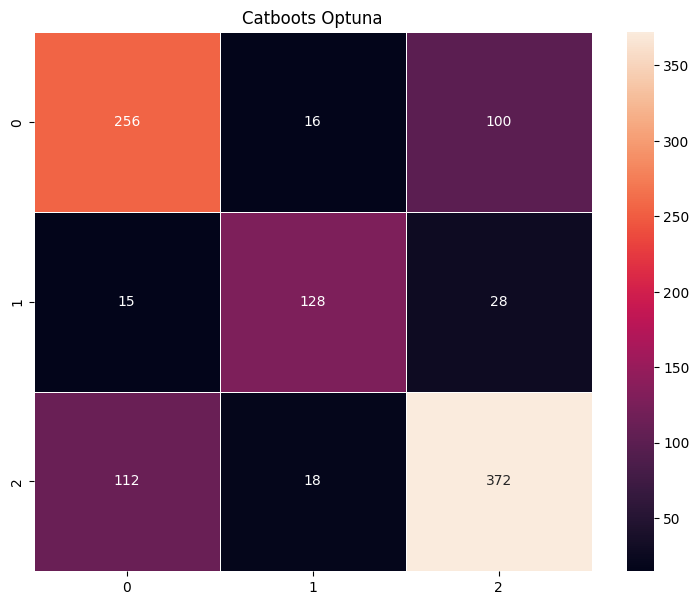

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,7))
plt.title("Catboots Optuna")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5 ,cbar=True),
plt.show()

# Test

In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test

In [30]:
b1 = df_test['b1']
b11 = df_test['b11']
b12 = df_test['b12']
b2 = df_test['b2']
b3 = df_test['b3']
b4 = df_test['b4']
b5 = df_test['b5']
b6 = df_test['b6']
b7 = df_test['b7']
b8 = df_test['b8']
b8a = df_test['b8_a']
b9 = df_test['b9']

In [31]:
df_test['NDVI'] = (df_test['b8'] - df_test['b4']) / (df_test['b8'] + df_test['b4'])
df_test['EVI'] = 2.5 * ((df_test['b8'] - df_test['b4']) / (df_test['b8'] + 6 * df_test['b4'] - 7.5 * df_test['b2'] + 1.01))
df_test['NDWI'] = (df_test['b3'] - df_test['b8']) / (df_test['b3'] + df_test['b8'])
df_test['SAVI'] = (df_test['b8'] - df_test['b4']) * (1 + 0.5) / (df_test['b8'] + df_test['b4'] + 0.5)
df_test['MSAVI'] = (2 * df_test['b8'] + 1 - ( (2 * df_test['b8'] + 1) ** 2 - 8 * (df_test['b8'] - df_test['b4'])) ** (1 / 2)) / 2
df_test['GNDVI'] = (df_test['b8'] - df_test['b3']) / (df_test['b8'] + df_test['b3'])
df_test['RENDVI'] = (df_test['b8'] - df_test['b5']) / (df_test['b8'] + df_test['b5'])
df_test['NDMI'] = (df_test['b8'] - df_test['b11']) / (df_test['b8'] + df_test['b11'])
df_test['GRVI'] = (df_test['b3'] - df_test['b4']) / (df_test['b3'] + df_test['b4'])
df_test['TVI'] = ( (df_test['b8'] - df_test['b4']) / (df_test['b8'] + df_test['b4'] + 0.5) ) ** (1 / 2)
df_test['MCARI'] = ((df_test['b5'] - df_test['b4']) - 0.2 * (df_test['b5'] - df_test['b3'])) / (df_test['b5'] / df_test['b4'])
df_test['BSI'] =  ((df_test['b11'] + df_test['b4']) - (df_test['b8'] + df_test['b2'])) / ((df_test['b11'] + df_test['b4']) + (df_test['b8'] + df_test['b2']))
df_test['NBR'] = (df_test['b8'] - df_test['b12']) / (df_test['b8'] + df_test['b12'])
df_test['MSI'] = df_test['b11'] / df_test['b8']

In [ ]:
df_test['Adjusted transformed soil-adjusted VI'] = 1.22 * (b8 - 1.22 * b4 - 0.03) / (1.22 * b8 + b4 - 1.22 * 0.03 + 0.08 * (1 + 1.22 ** 2))
df_test['Aerosol free vegetation index 1600'] = b8 - 0.66 * b11 / (b8 + 0.66 * b11)
df_test['Aerosol free vegetation index 2100'] = b8 - 0.5 * b12 / (b8 + 0.56 * b12)
df_test['Alteration'] = b11 / b12
df_test['Anthocyanin reflectance index'] = 1 / b3 - 1 / b5
df_test['Atmospherically Resistant Vegetation Index 2'] = -0.18 + 1.17 * (b8 - b4) / (b8 + b4)
df_test['Blue-wide dynamic range vegetation index'] = (0.1 * b8 - b2) / (0.1 * b8 + b2)
df_test['Browning Reflectance Index'] = (1 / b3 - 1 / b5) / b8
df_test['Chlorophyll Absorption Ratio Index'] = (b5 / b4) * np.sqrt(((b5 - b3) / 150 * 670 + b4 + (b3 - ((b5 - b3) / 150 * 550))) ** 2) / np.sqrt(((b5 - b3) / (150 ** 2) + 1))
df_test['Chlorophyll Green'] = (b7 / b3) ** -1
df_test['Chlorophyll Index Green'] = (b8 / b3) - 1
df_test['Chlorophyll IndexRedEdge'] = (b8 / b5) - 1
df_test['Chlorophyll Red-Edge'] = (b7 / b5) ** -1
df_test['Chlorophyll vegetation index'] = b8 * b4 / (b3 ** 2)
df_test['Coloration Index'] = (b4 - b2) / b4
df_test['CRI550'] = (b2.astype(float) ** -1) - (b3.astype(float) ** -1)
df_test['CRI700'] = (b2.astype(float) ** -1) - (b5.astype(float) ** -1)
df_test['Datt1'] = (b8 - b5) / (b8 - b4)
df_test['Datt4'] = b4 / (b3 * b5)
df_test['Datt6'] = b8a / (b3 * b5)
df_test['Difference 678/500'] = b4 - b2
df_test['Difference 800/550'] = b8 - b3
df_test['Difference 800/680'] = b8 - b4
df_test['Difference 833/658'] = b8 - b4
df_test['Difference NIR/Green'] = b8 - b3
df_test['EVI'] = 2.5 * (b8 - b4) / (b8 + (6 * b4) + (-7.5 * b2) + 1)
df_test['EVI 2'] = 2.4 * (b8 - b4) / (b8 + b4 + 1)
df_test['Ferrous Silicates'] = b12 / b11
df_test['Global Environment Monitoring Index'] =  (2 * (b8 ** 2 - b4 ** 2) + 1.5 * b8 + 0.5 * b4) / (b8 + b4 + 0.5) * (1 - 0.25 * (2 * (b8 ** 2 - b4 ** 2) + 1.5 * b8 + 0.5 * b4) / (b8 + b4 + 0.5)) - ((b4 - 0.125) / (1 - b4))
df_test['Gossan'] = b11 / b4
df_test['Green atmospherically resistant vegetation index'] = (b8 - (b3 - (b2 - b4)))/(b8 - (b3 + (b2 - b4)))
df_test['Green leaf index'] = (2 * b3 - b4 - b2) / (2 * b3 + b4 + b2)
df_test['Green Normalized Difference Vegetation Index'] = (b8 - b3) / (b8 + b3)
df_test['Green Soil Adjusted Vegetation Index'] = (b8 - b3) / (b8 + b3 + 0.48) * (1 + 0.48)
df_test['Green-Blue NDVI'] = (b8 - (b3 + b2)) / (b8 + (b3 + b2))
df_test['Green-Red NDVI'] = (b8 - (b3 + b4)) / (b8 + (b3 + b4))
df_test['Hue'] = np.arctan((2 * b4 - b3 - b2) / (30.5 * (b3 - b2)))
df_test['Infrared percentage vegetation index'] = (b8 / (b8 + b4)) / 2 * (df_test['NDVI'] + 1)
df_test['Intensity'] = (1/30.5) * (b4 + b3 + b2)
df_test['Inverse reflectance 550'] = b3.astype(float) ** -1
df_test['Inverse reflectance 700'] = b5.astype(float) ** -1
df_test['Laterite'] = b11 / b12
df_test['Leaf Chlorophyll Index'] = (b8 - b5) / (b8 + b4)
df_test['Log Ratio'] = np.log(b8 / b4)
df_test['Maccioni'] = (b7 - b5) / (b7 - b4)
df_test['MCARI/MTVI2'] = (((b5 - b4) - 0.2 * (b5 - b3)) * (b5 / b4)) / (1.5 * (1.2 * (b8 - b3) - 2.5 * (b4 - b3)) / (np.sqrt((2 * b8 + 1) ** 2 - (6 * b8 - 5 * np.sqrt(4)) - 0.5)))
df_test['MCARI/OSAVI'] = ((b5 - b4) - 0.2 * (b5 - b3) * (b5 / b4))/ ((1 + 0.16) * (b8 - b4) / (b8 + b4 + 0.16))
df_test['mCRIG'] = (b2.astype(float) ** -1 - b3.astype(float) ** -1) * b8
df_test['mCRIRE'] = (b2.astype(float) ** -1 - b5.astype(float) ** -1) * b8
df_test['mND680'] = (b8 - b4) / (b8 + b4 - 2 * b1)
df_test['Modified anthocyanin reflectance index'] = (b3.astype(float) ** -1 - b5.astype(float) ** -1) * b8
df_test['Modified Chlorophyll Absorption in Reflectance Index'] = ((b5 - b4) - 0.2 * (b5 - b3)) * (b5 / b4)
df_test['Modified Chlorophyll Absorption in Reflectance Index 1'] = 1.2 * (2.5 * (b8 - b4) - 1.3 * (b8 - b3))
df_test['Modified Chlorophyll Absorption in Reflectance Index 2'] = 1.5 * (2.5 * (b8 - b4) - 1.3 * (b8 - b3)) / (np.sqrt((2 * b8 + 1) ** 2 - (6 * b8 - 5 * np.sqrt(b4)) - 0.5))
df_test['Modified NDVI'] = (b8 - b4) / (b8 + b4 - 2 * b1)
df_test['Modified Simple Ratio 670,800'] = ((b8 / b4) - 1) /np.sqrt((b8 - b4) + 1)
df_test['Modified Simple Ratio NIR/RED'] = ((b8 / b4) - 1) /np.sqrt((b8 / b4) + 1)
df_test['Modified Soil Adjusted Vegetation Index'] = (2 * b8 + 1 - np.sqrt((2 * b8 + 1) ** 2 - 8 * (b8 - b4)))/2
df_test['Modified Soil Adjusted Vegetation Index hyper'] = (0.5) * ((2 * b8 + 1) - np.sqrt((2 * b8 + 1) ** 2 - 8 * (b8 - b4)))
df_test['Modified Triangular Vegetation Index 1'] = 1.2 * (1.2 * (b8 - b3) - 2.5 * (b4 - b3))
df_test['Modified Triangular Vegetation Index 2'] = 1.5 * (1.2 * (b8 - b3) - 2.5 * (b4 - b3)) / np.sqrt((2 * b8 + 1) ** 2 - (6 * b8 - 5 * np.sqrt(b4)) - 0.5)
df_test['Norm G'] = b3 / (b8 + b4 + b3)
df_test['Norm NIR'] = b8 / (b8 + b4 + b3)
df_test['Norm R'] = b4 / (b8 + b4 + b3)
df_test['Normalized Difference 550/450'] = (b3 - b1) / (b3 + b1)
df_test['Normalized Difference 550/650'] = (b3 - b4) / (b3 + b4)
df_test['Normalized Difference 774/677'] = (b7 - b4) / (b7 + b4)
df_test['Normalized Difference 780/550'] = (b7 - b3) / (b7 + b3)
df_test['Normalized Difference 782/666'] = (b7 - b4) / (b7 + b4)
df_test['Normalized Difference 790/670'] = (b7 - b4) / (b7 + b4)
df_test['Normalized Difference 800/2170'] = (b8 - b12) / (b8 + b12)
df_test['Normalized Difference 800/470'] = (b8 - b2) / (b8 + b2)
df_test['Normalized Difference 800/500'] = (b8 - b2) / (b8 + b2)
df_test['Normalized Difference 800/550'] = (b8 - b3) / (b8 + b3)
df_test['Normalized Difference 800/650'] = (b8 - b4) / (b8 + b4)
df_test['Normalized Difference 800/675'] = (b8 - b4) / (b8 + b4)
df_test['Normalized Difference 800/680'] = (b8 - b4) / (b8 + b4)
df_test['Normalized Difference 819/1600'] = (b8 - b11) / (b8 + b11)
df_test['Normalized Difference 819/1649'] = (b8 - b11) / (b8 + b11)
df_test['Normalized Difference 820/1600'] = (b8 - b11) / (b8 + b11)
df_test['Normalized Difference 827/668'] = (b8 - b4) / (b8 + b4)
df_test['Normalized Difference 833/1649'] = (b8 - b11) / (b8 + b11)
df_test['Normalized Difference 833/658'] = (b8 - b4) / (b8 + b4)
df_test['Normalized Difference 860/1640'] = (b8a - b11) / (b8a + b11)
df_test['Normalized Difference 895/675'] = (b8 - b4) / (b8 + b4)
df_test['Normalized Difference Green/Red'] = (b3 - b4) / (b3 + b4)
df_test['Normalized Difference NIR/Blue'] = (b8 - b2) / (b8 + b2)
df_test['Normalized Difference NIR/Green'] = (b8 - b3) / (b8 + b3)
df_test['Normalized Difference NIR/Red'] = (b8 - b4) / (b8 + b4)
df_test['Normalized Difference NIR/Rededge'] = (b8 - b5) / (b8 + b5)
df_test['Normalized Difference Red/Green'] = (b4 - b3) / (b4 + b3)
df_test['Normalized Difference Salinity Index'] = (b11 - b12) / (b11 + b12)
df_test['Normalized Difference Vegetation Index 690-710'] = (b8 - b5) / (b8 + b5)
df_test['Optimized Soil Adjusted Vegetation Index'] = (1 + 0.16) * (b8 - b4) / (b8 + b4 + 0.16)
df_test['Pan NDVI'] = (b8 - (b3 + b4 + b2)) / (b8 + (b3 + b4 + b2))
df_test['RDVI'] = (b8 - b4) / ((b8 + b4).pow(0.5))
df_test['RDVI2'] = (b8 - b4) / ((b8 + b4).pow(0.5))
df_test['Red edge 1'] = b5 / b4
df_test['Red edge 2'] = (b5 - b4) / (b5 + b4)
df_test['Red-Blue NDVI'] = (b8 - (b4 + b2)) / (b8 + (b4 + b2))
df_test['Red-Edge Inflection Point 1'] = 700 + 40 * ((((b4 + b7) / 2) - b5) / (b6 - b5))
df_test['Red-Edge Inflection Point 2'] = 702 + 40 * ((((b4 + b7) / 2) - b5) / (b6 - b5))
df_test['Red-Edge Inflection Point 3'] = 705 + 35 * ((((b4 + b7) / 2) - b5) / (b6 - b5))
df_test['Red-Edge Position Linear Interpolation'] = 700 + 40 * ((((b4 + b7) / 2) - b5) / (b6 - b5))
df_test['Reflectance at the inflexion point'] = (b4 + b7) / 2
df_test['Renormalized Difference Vegetation Index'] = (b8 - b4) / ((b8 + b4).pow(0.5))
df_test['Simple Ratio 1600/820'] = b11 / b8
df_test['Simple Ratio 1650/2218'] = b11 / b12
df_test['Simple Ratio 440/740'] = b1 / b6
df_test['Simple Ratio 450/550'] = b1 / b3
df_test['Simple Ratio 520/670'] = b2 / b4
df_test['Simple Ratio 550/800'] = b3 / b8
df_test['Simple Ratio 560/658'] = b3 / b4
df_test['Simple Ratio 675/555'] = b4 / b3
df_test['Simple Ratio 675/705'] = b4 / b5
df_test['Simple Ratio 700'] = 1 / b5
df_test['Simple Ratio 710/670'] = b5 / b4
df_test['Simple Ratio 735/710'] = b6 / b5
df_test['Simple Ratio 774/677'] = b7 / b4
df_test['Simple Ratio 800/2170'] = b8 / b12
df_test['Simple Ratio 800/500'] = b8 / b2
df_test['Simple Ratio 810/560'] = b8 / b3
df_test['Simple Ratio 833/1649'] = b8 / b11
df_test['Simple Ratio 833/658'] = b8 / b4
df_test['Simple Ratio 850/710'] = b8 / b5
df_test['Simple Ratio 860/550'] = b8a / b3
df_test['Simple Ratio 860/708'] = b8a / b5
df_test['Simple Ratio NIR/700-715'] = b8 / b5
df_test['Simple Ratio NIR/G'] = b8 / b3
df_test['Simple Ratio NIR/RED'] = b8 / b4
df_test['Simple Ratio NIR/Rededge'] = b8 / b5
df_test['Simple Ratio Red/Blue'] = b4 / b2
df_test['Simple Ratio Red/Green'] = b4 / b3
df_test['Simple Ratio Red/NIR'] = b4 / b8
df_test['Soil Adjusted Vegetation Index'] = (b8 - b4) / (b8 + b4 + 0.48) * (1 + 0.48)
df_test['SQRT(IR/R)'] = (b8 / b4).pow(0.5)
df_test['Structure Intensive Pigment Index 1'] = (b8 - b1) / (b8 - b4)
df_test['Structure Intensive Pigment Index 3'] = (b8 - b2) / (b8 - b4)
df_test['TCARI/OSAVI'] = (3 * ((b5 - b4) - (0.2 * (b5 - b3) * (b5 / b4)))) / ((1 + 0.16) * ((b8 - b4)/(b8 + b4 + 0.16)))
df_test['Transformed Chlorophyll Absorbtion Ratio'] = 3 * ((b5 - b4) - (0.2 * (b5 - b3) * (b5 / b4)))
df_test['Transformed NDVI'] = ((b8 - b4) / (b8 + b4) + 0.5).pow(0.5)
df_test['Triangular chlorophyll index'] = 1.2 * (b5 - b3) - 1.5 * (b4 - b3) * (b5 / b4).pow(0.5)
df_test['Vegetation Index 700'] = (b5 - b4) / (b5 + b4)
df_test['Visible Atmospherically Resistant Index Green'] = (b3 - b4) / (b3 + b4 + b2)
df_test['Visible Atmospherically Resistant Indices RedEdge'] = (b5 - b4) / (b5 + b4)
df_test['Wide Dynamic Range Vegetation Index'] = (0.1 * b8 - b4) / (0.1 * b8 + b4)

In [ ]:
feature = [
    'b1', 'b11', 'b12', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b8_a', 'b9', 'NDVI', 'EVI', 'NDWI', 'SAVI', 'MSAVI',
    'GNDVI', 'RENDVI', 'NDMI', 'GRVI', 'TVI', 'MCARI', 'BSI', 'NBR', 'MSI'
    , 'Adjusted transformed soil-adjusted VI',
    'Aerosol free vegetation index 1600', 'Aerosol free vegetation index 2100', 'Alteration', 'Anthocyanin reflectance index',
    'Atmospherically Resistant Vegetation Index 2', 'Blue-wide dynamic range vegetation index', 'Browning Reflectance Index',
    'Chlorophyll Absorption Ratio Index', 'Chlorophyll Green', 'Chlorophyll Index Green', 'Chlorophyll IndexRedEdge',
    'Chlorophyll Red-Edge', 'Chlorophyll vegetation index', 'Coloration Index', 'CRI550', 'CRI700', 'Datt1', 'Datt4',
    'Datt6', 'Difference 678/500', 'Difference 800/550', 'Difference 800/680', 'Difference 833/658', 'Difference NIR/Green',
    'EVI 2', 'Ferrous Silicates', 'Global Environment Monitoring Index', 'Gossan', 'Green atmospherically resistant vegetation index',
    'Green leaf index', 'Green Normalized Difference Vegetation Index', 'Green Soil Adjusted Vegetation Index', 'Green-Blue NDVI',
    'Green-Red NDVI', 'Hue', 'Infrared percentage vegetation index', 'Intensity', 'Inverse reflectance 550', 'Inverse reflectance 700',
    'Laterite', 'Leaf Chlorophyll Index', 'Log Ratio', 'Maccioni', 'MCARI/MTVI2', 'MCARI/OSAVI', 'mCRIG', 'mCRIRE', 'mND680',
    'Modified anthocyanin reflectance index', 'Modified Chlorophyll Absorption in Reflectance Index',
    'Modified Chlorophyll Absorption in Reflectance Index 1', 'Modified Chlorophyll Absorption in Reflectance Index 2',
    'Modified NDVI', 'Modified Simple Ratio 670,800', 'Modified Simple Ratio NIR/RED', 'Modified Soil Adjusted Vegetation Index',
    'Modified Soil Adjusted Vegetation Index hyper', 'Modified Triangular Vegetation Index 1', 'Modified Triangular Vegetation Index 2',
    'Norm G', 'Norm NIR', 'Norm R', 'Normalized Difference 550/450', 'Normalized Difference 550/650', 'Normalized Difference 774/677',
    'Normalized Difference 780/550', 'Normalized Difference 782/666', 'Normalized Difference 790/670', 'Normalized Difference 800/2170',
    'Normalized Difference 800/470', 'Normalized Difference 800/500', 'Normalized Difference 800/550', 'Normalized Difference 800/650',
    'Normalized Difference 800/675', 'Normalized Difference 800/680', 'Normalized Difference 819/1600', 'Normalized Difference 819/1649',
    'Normalized Difference 820/1600', 'Normalized Difference 827/668', 'Normalized Difference 833/1649', 'Normalized Difference 833/658',
    'Normalized Difference 860/1640', 'Normalized Difference 895/675', 'Normalized Difference Green/Red', 'Normalized Difference NIR/Blue',
    'Normalized Difference NIR/Green', 'Normalized Difference NIR/Red', 'Normalized Difference NIR/Rededge', 'Normalized Difference Red/Green',
    'Normalized Difference Salinity Index', 'Normalized Difference Vegetation Index 690-710', 'Optimized Soil Adjusted Vegetation Index',
    'Pan NDVI', 'RDVI', 'RDVI2', 'Red edge 1', 'Red edge 2', 'Red-Blue NDVI', 'Red-Edge Inflection Point 1', 'Red-Edge Inflection Point 2',
    'Red-Edge Inflection Point 3', 'Red-Edge Position Linear Interpolation', 'Reflectance at the inflexion point',
    'Renormalized Difference Vegetation Index', 'Simple Ratio 1600/820', 'Simple Ratio 1650/2218', 'Simple Ratio 440/740',
    'Simple Ratio 450/550', 'Simple Ratio 520/670', 'Simple Ratio 550/800', 'Simple Ratio 560/658', 'Simple Ratio 675/555',
    'Simple Ratio 675/705', 'Simple Ratio 700', 'Simple Ratio 710/670', 'Simple Ratio 735/710', 'Simple Ratio 774/677',
    'Simple Ratio 800/2170', 'Simple Ratio 800/500', 'Simple Ratio 810/560', 'Simple Ratio 833/1649', 'Simple Ratio 833/658',
    'Simple Ratio 850/710', 'Simple Ratio 860/550', 'Simple Ratio 860/708', 'Simple Ratio NIR/700-715', 'Simple Ratio NIR/G',
    'Simple Ratio NIR/RED', 'Simple Ratio NIR/Rededge', 'Simple Ratio Red/Blue', 'Simple Ratio Red/Green', 'Simple Ratio Red/NIR',
    'Soil Adjusted Vegetation Index', 'SQRT(IR/R)', 'Structure Intensive Pigment Index 1', 'Structure Intensive Pigment Index 3',
    'TCARI/OSAVI', 'Transformed Chlorophyll Absorbtion Ratio', 'Transformed NDVI', 'Triangular chlorophyll index', 'Vegetation Index 700',
    'Visible Atmospherically Resistant Index Green', 'Visible Atmospherically Resistant Indices RedEdge', 'Wide Dynamic Range Vegetation Index'
]
df_test_feature = df_test[feature]
df_test_feature

In [ ]:
test_cat = clf_model.predict(df_test_feature)
print(test_cat , "len : ", len(test_cat))

In [ ]:
#catboots
test_cat = [item for sublist in test_cat for item in sublist]

print(test_cat)

In [36]:
sample_sub = pd.read_csv('/content/sample_submission.csv')
sample_sub

,id,nforest_type
0,13467,DEF
1,12719,DDF
2,1054,MDF
3,13747,NaN
4,9453,NaN
...,...,...
3995,115,NaN
3996,10654,NaN
3997,5718,NaN
3998,13054,NaN


In [37]:
sample_sub['nforest_type'] = test_cat
sample_sub

,id,nforest_type
0,13467,DEF
1,12719,MDF
2,1054,MDF
3,13747,DDF
4,9453,DDF
...,...,...
3995,115,DEF
3996,10654,MDF
3997,5718,DEF
3998,13054,MDF


In [38]:
sample_sub['nforest_type'].value_counts()

nforest_type
MDF    1727
DDF    1441
DEF     832
Name: count, dtype: int64

In [39]:
sample_sub['nforest_type'].isnull().sum()

0

In [ ]:
sample_sub.to_csv('submission_optuna_feature_focus_day4.csv', index=False)

# Top5 best score to majority vote

In [ ]:
from collections import Counter

def majority_vote(lst):
    # Count occurrences of each element
    counts = Counter(lst)

    # Find the element(s) with the maximum count
    max_count = max(counts.values())
    majority_elements = [key for key, value in counts.items() if value == max_count]

    # If there is a single majority element, return it
    if len(majority_elements) == 1:
        return majority_elements[0]
    else:
        return None  # Return None in case of a tie


In [ ]:
df1 = pd.read_csv('/content/submission_onlycat_day3.csv')
df2 = pd.read_csv('/content/submission_catboot_optuna_search_day3.csv')
df3 = pd.read_csv('/content/submission_catboot_optuna_feature_focus_day3.csv')
df4 = pd.read_csv('/content/submission_optuna_feature_focus_day4.csv')
df5 = pd.read_csv('/content/submission_optuna_littelfeature_day4.csv')

In [ ]:
df_list1 = df1['nforest_type'].tolist()
df_list2 = df2['nforest_type'].tolist()
df_list3 = df3['nforest_type'].tolist()
df_list4 = df4['nforest_type'].tolist()
df_list5 = df5['nforest_type'].tolist()
df_list5[:20]

['DEF',
 'DDF',
 'MDF',
 'DDF',
 'DDF',
 'MDF',
 'MDF',
 'DDF',
 'MDF',
 'DDF',
 'MDF',
 'MDF',
 'MDF',
 'MDF',
 'MDF',
 'DDF',
 'MDF',
 'DDF',
 'DDF',
 'DEF']

In [ ]:
sub = []
for i in range(4000):
  vote = []
  
  vote.append(df_list1[i])
  vote.append(df_list2[i])
  vote.append(df_list3[i])
  vote.append(df_list4[i])
  vote.append(df_list5[i])

  vote_kub = majority_vote(vote)
  sub.append(vote_kub)
sub[:10]

['DEF', 'MDF', 'MDF', 'DDF', 'DDF', 'MDF', 'MDF', 'DDF', 'MDF', 'DDF']

In [ ]:
sample_sub = pd.read_csv('/content/sample_submission.csv')
sample_sub

,id,nforest_type
0,13467,DEF
1,12719,DDF
2,1054,MDF
3,13747,NaN
4,9453,NaN
...,...,...
3995,115,NaN
3996,10654,NaN
3997,5718,NaN
3998,13054,NaN


In [ ]:
sample_sub['nforest_type'] = sub
sample_sub

,id,nforest_type
0,13467,DEF
1,12719,MDF
2,1054,MDF
3,13747,DDF
4,9453,DDF
...,...,...
3995,115,DEF
3996,10654,MDF
3997,5718,DEF
3998,13054,MDF


In [ ]:
sample_sub['nforest_type'].value_counts()

nforest_type
MDF    1753
DDF    1423
DEF     811
Name: count, dtype: int64

In [ ]:
sample_sub['nforest_type'].isnull().sum()

13

In [ ]:
sample_sub['nforest_type'].fillna("MDF",inplace=True)
sample_sub['nforest_type'].isnull().sum()

0

In [ ]:
sample_sub.to_csv('submission_optuna_final_vote_day4.csv', index=False)